In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model 
import statsmodels.formula.api as smf
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Nikhil\\DS\\ML\\Assignments\\Simple linear regresion\\delivery_time.csv")
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


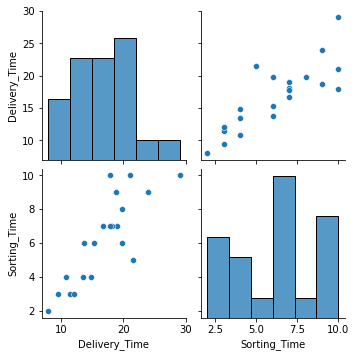

In [5]:
sns.pairplot(df)

<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

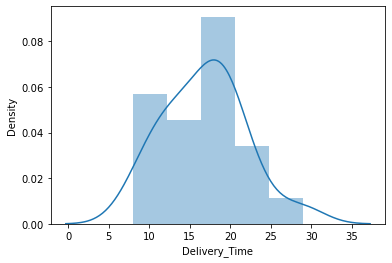

In [6]:
sns.distplot(df['Delivery_Time'])

<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

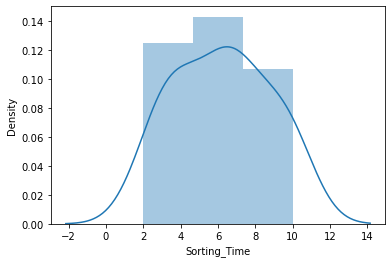

In [7]:
sns.distplot(df['Sorting_Time'])

# Making a model

In [8]:
# Creating a model by using ols funtion
model = smf.ols("Delivery_Time ~ Sorting_Time", data = df).fit()

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

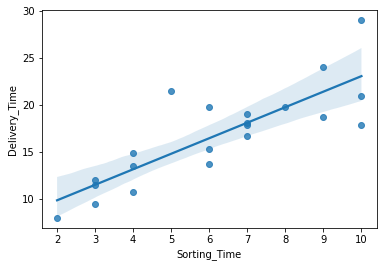

In [9]:
#To see the best fit line
sns.regplot(x= 'Sorting_Time',y='Delivery_Time',data=df)

In [10]:
# Coefficient
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [11]:
# To see model predicitions
model.fittedvalues

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [12]:
df["Predicted_delivery"] = model.fittedvalues
df

,Delivery_Time,Sorting_Time,Predicted_delivery
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


In [13]:
df["Errors"] =model.resid
df

,Delivery_Time,Sorting_Time,Predicted_delivery,Errors
0,21.00,10,23.072933,-2.072933
1,13.50,4,13.178814,0.321186
2,19.75,6,16.476853,3.273147
3,24.00,9,21.423913,2.576087
4,29.00,10,23.072933,5.927067
5,15.35,6,16.476853,-1.126853
6,19.00,7,18.125873,0.874127
7,9.50,3,11.529794,-2.029794
8,17.90,10,23.072933,-5.172933
9,18.75,9,21.423913,-2.673913


In [14]:
Mean_squared_error = df['Errors'].mean()
Mean_squared_error

-3.891067362495787e-15

In [15]:
model.rsquared
# 68.2% of variation in the dependent variable is explained by the given independent variable

0.6822714748417231

In [16]:
model.pvalues
# Since p-value is less then 0.05 for 'Sorting_Time' variable, 
# we can say that it is a significant variable in predicting the dependent variable 'Sorting_Time'

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64

# Making 2nd model

In [17]:
# Creating a new model by using ols funtion and applying log transformation
new_model2= smf.ols("Delivery_Time ~ np.square(Sorting_Time)", data = df).fit()
new_model2.rsquared
# 63.02% of variation in the dependent variable is explained by the given independent variable

0.6302871815826637

# Making 3rd model

In [18]:
# Creating a new model by using ols funtion and applying log transformation
new_model3= smf.ols("np.square(Delivery_Time) ~ np.square(Sorting_Time)", data = df).fit()
new_model3.rsquared
# 58.8% of variation in the dependent variable is explained by the given independent variable

0.5881883446986836

# Making 4th model

In [19]:
# Creating a new model by using ols funtion and applying log transformation
new_model4= smf.ols("Delivery_Time ~ np.sqrt(Sorting_Time)", data = df).fit()
new_model4.rsquared
# 69.5% of variation in the dependent variable is explained by the given independent variable

0.695806227630867

# Making 5th model

In [20]:
# Creating a new model by using ols funtion and applying log transformation
new_model5= smf.ols("np.sqrt(Delivery_Time) ~ np.sqrt(Sorting_Time)", data = df).fit()
new_model5.rsquared
# 72.9% of variation in the dependent variable is explained by the given independent variable

0.7292011987544664

# Making 6th model

In [21]:
# Creating a new model by using ols funtion and applying log transformation
new_model6= smf.ols("Delivery_Time ~ np.log(Sorting_Time)", data = df).fit()
new_model6.rsquared
# 69.5% of variation in the dependent variable is explained by the given independent variable

0.6954434611324223

# Making 7th model

In [22]:
# Creating a new model by using ols funtion and applying log transformation
new_model7= smf.ols("np.log(Delivery_Time) ~ np.log(Sorting_Time)", data = df).fit()
new_model7.rsquared
# 77.2% of variation in the dependent variable is explained by the given independent variable

0.77216134926874

In [23]:
# Now here we get the best accuracy in 7th model

## Predict for new data point

In [24]:
#Predict for 13 and 15 daily circulation
newdata=pd.Series([13,15])
newdata

0    13
1    15
dtype: int64

In [25]:
new = pd.DataFrame(newdata,columns =['Time'])
new

,Time
0,13
1,15


In [26]:
new_model7.predict(new)

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'Sorting_Time' is not defined
    np.log(Delivery_Time) ~ np.log(Sorting_Time)
                            ^^^^^^^^^^^^^^^^^^^^